#**NETFLİX DATA ANALYSİS** 

by tanersuleyman


*   [github](https://github.com/tsuleyman)
*   [Linkedin](https://www.linkedin.com/in/tsuleyman/)


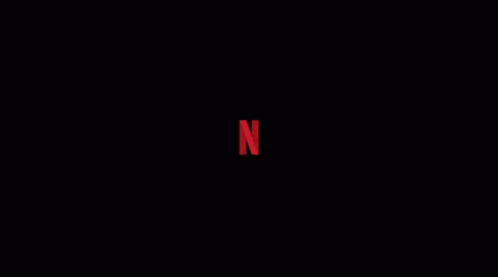


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# **LOADING AND UNDERSTANDING DATA**

In [4]:
data = pd.read_csv("NetflixOriginals.csv", encoding="windows_1258") #Read Data

In [5]:
data.head(10) #Let's examine the first 10 columns of data!

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


In [6]:
data.tail(10) # Let's examine the last 10 columns of data!

,Title,Genre,Premiere,Runtime,IMDB Score,Language
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [7]:
#Let's ask for information about the total rows and columns that exist in the data set.
print("Number of rows found in the dataset::", data.shape[0])
print("Number of columns found in the dataset:", data.shape[1])

Number of rows found in the dataset:: 584
Number of columns found in the dataset: 6


In [8]:
data.describe().T #What is the transpose of the numeric variables in the data set?

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0


In [9]:
data.info() #What are the data types of the columns in the data set?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [10]:
#The date information, which is the stringer in the "Premiere" column, has been converted to date format and assigned as the "Date" column!
data["Date"] = pd.to_datetime(data.Premiere) 

# Created a column representing days named "Day" !
data['Day'] = data['Date'].dt.day_of_week 

# Created a column representing months named "Month"
data['Month'] = data['Date'].dt.month

#Created a column representing years named "Year"
data['Year'] = data['Date'].dt.year 

#Removed the "Premiere" column as it is no longer needed.
data.drop("Premiere", axis=1, inplace=True) 
data.head()

,Title,Genre,Runtime,IMDB Score,Language,Date,Day,Month,Year
0,Enter the Anime,Documentary,58,2.5,English/Japanese,2019-08-05,0,8,2019
1,Dark Forces,Thriller,81,2.6,Spanish,2020-08-21,4,8,2020
2,The App,Science fiction/Drama,79,2.6,Italian,2019-12-26,3,12,2019
3,The Open House,Horror thriller,94,3.2,English,2018-01-19,4,1,2018
4,Kaali Khuhi,Mystery,90,3.4,Hindi,2020-10-30,4,10,2020


In [11]:
#For repetitive data checking
print("Number of duplicated/replicated data in dataset:", data.duplicated().sum())

Number of duplicated/replicated data in dataset: 0


# **EXPLORATORY DATA ANALYSIS**

## **In which language were the long-running movies created according to the dataset?**

In [28]:
#Let's call movies with movie durations more than 2 hours Long-running movies.
runtime_threshold = 120.0 
#Datasets of movies that are more than 2 hours in duration
runtime_thresh_data = data[data.Runtime >=runtime_threshold].sort_values(by="Runtime", ascending=False) 

runtime_thresh_data

,Title,Genre,Runtime,IMDB Score,Language,Date,Day,Month,Year
561,The Irishman,Crime drama,209,7.8,English,2019-11-27,2,11,2019
328,Da 5 Bloods,War drama,155,6.5,English,2020-06-12,4,6,2020
581,Springsteen on Broadway,One-man show,153,8.5,English,2018-12-16,6,12,2018
284,The Forest of Love,Drama,151,6.3,Japanese,2019-10-11,4,10,2019
247,Citation,Drama,151,6.2,English,2020-11-06,4,11,2020
...,...,...,...,...,...,...,...,...,...
287,The Outsider,Crime drama,120,6.3,English/Japanese,2018-03-09,4,3,2018
97,Dolly Kitty and Those Twinkling Stars,Drama,120,5.4,Hindi,2020-09-18,4,9,2020
335,Lust Stories,Drama,120,6.5,Hindi,2018-06-15,4,6,2018
192,A Fall from Grace,Thriller,120,5.9,English,2020-01-17,4,1,2020








*   We have determined the films with 'Runtime' over 120.0 minutes as long-running films.

*   Accordingly, films that are larger than this threshold value are called long-running films, and films that are smaller are called short-run films.

*   When we filter the data set according to the ones higher than the limit value, we see that there are 37 long-running films, most of which were shot in English.

*   The longest film is "The Irishman", which was shot in English on November 27, 2019 in the genre of "Crime Drama" and has a runtime of 209.





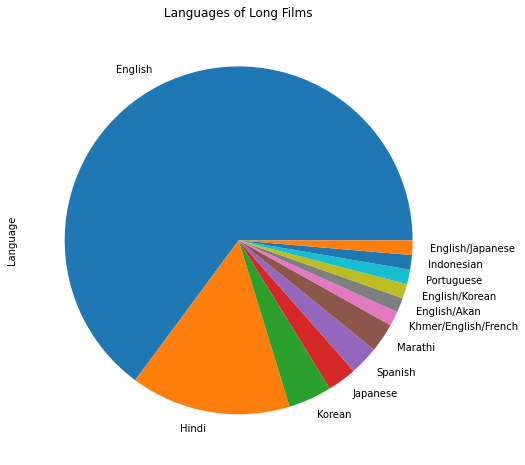

In [29]:
#Viz.
plt.figure(figsize=(8,8))
runtime_thresh_data["Language"].value_counts().plot(kind='pie')

plt.title("Languages of Long Films")

plt.xticks(rotation=90)
plt.show()



As can be seen from the chart above, most of the feature films were shot in English (more than 20 English-language films are long-running).

After English, long-running films were shot in the following languages, respectively;


1.   Hindi
2.   Korean
3.   Japanese
4.   Spanish
5.   English/Ghana and Ivory
6.   Campo/English/French




## **2.What are the IMDB values of movies shot in the 'Documentary' genre between January 2019 and June 2020?**

In [14]:
# the variable "Month" in the data is defined as '1' for 'January' and '6' for 'June'.
January = 1 
June = 6 

start = (data["Year"]==2019) & (data["Month"]>=January) 
finish = (data["Year"]==2020) & (data["Month"]<=June) 



*   January is defined as 1 in the "Month" variable in the data set. For this reason, we have assigned the January variable as 1 observation. In addition, the month of June is defined as 6. That's why we assigned a variable with the name June, which is equal to 6 observations

*   Next, we assigned a variable named "start", which indicates after January 2019, in the dataset, and a variable named "end", which indicates before June 2020.

*   Now, let's show the IMDB values of the movies shot in the "Documentary" genre between January 2019 and June 2020 on a dataframe using the "start" and "end" variables.




In [15]:
date_range = data.loc[:, ["Title","Genre","IMDB Score", "Date"]][data["Genre"] == "Documentary"][start | finish] 

date_range.sort_values(by = "Date", ascending=True) 

,Title,Genre,IMDB Score,Date
510,ReMastered: Massacre at the Stadium,Documentary,7.3,2019-01-11
482,Fyre: The Greatest Party That Never Happened,Documentary,7.2,2019-01-18
511,ReMastered: The Two Killings of Sam Cooke,Documentary,7.3,2019-02-08
524,Period. End of Sentence.,Documentary,7.4,2019-02-12
324,Antoine Griezmann: The Making of a Legend,Documentary,6.5,2019-03-21
444,ReMastered: The Miami Showband Massacre,Documentary,7.0,2019-03-22
286,The Legend of Cocaine Island,Documentary,6.3,2019-03-29
536,Homecoming: A Film by Beyonce,Documentary,7.5,2019-04-17
554,Brene Brown: The Call to Courage,Documentary,7.7,2019-04-19
462,Grass Is Greener,Documentary,7.1,2019-04-20


According to the table above, 53 documentary films were shot between January 2019 and June 2020.

Now let's see the shooting dates of these movies and their IMDB scores on a graph.

No handles with labels found to put in legend.


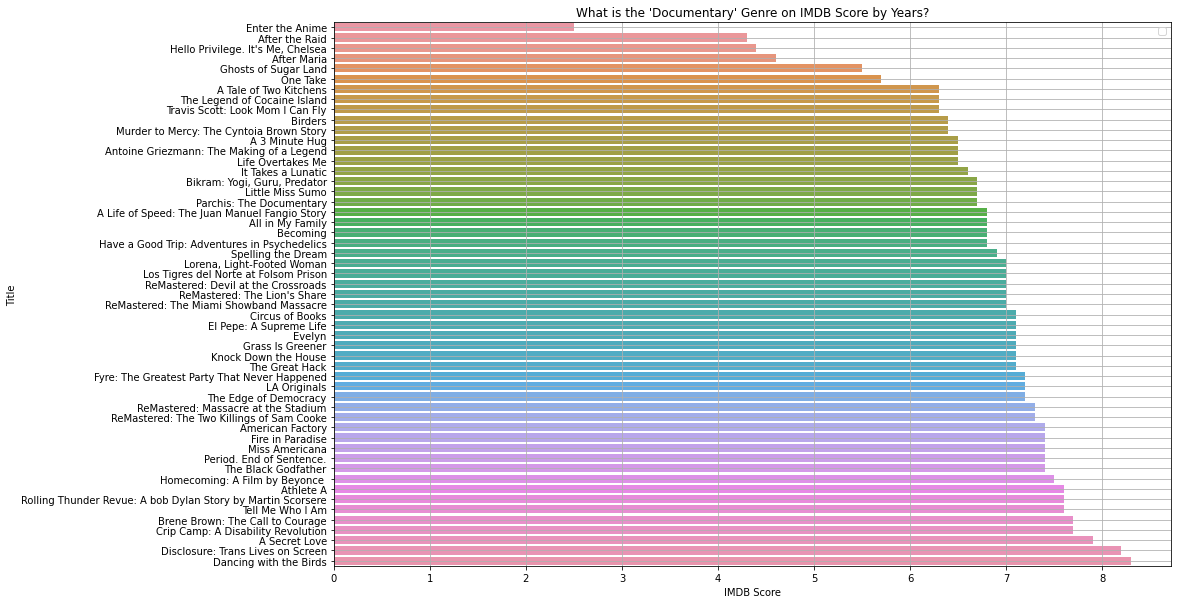

In [16]:
#Viz.
plt.figure(figsize=(15,10))

sns.barplot(date_range["IMDB Score"], date_range["Title"] )


plt.title("What is the 'Documentary' Genre on IMDB Score by Years?")
plt.legend()
plt.grid()

plt.show()



*   A Documentary filmed on October 23, 2019 has the highest score with an IMDB Score of 8.3.

*   A Documentary filmed on August 5, 2019 has the lowest score with an IMDB score of 2.5.



## **3. Which genre has the highest IMDB rating among movies shot in English?**

In [17]:
english_best_imdb = data.loc[:, ["Language", "IMDB Score", "Genre"]][data["IMDB Score"] == data["IMDB Score"].max()][data["Language"] == "English"]

english_best_imdb #Answer is Documentary

,Language,IMDB Score,Genre
583,English,9.0,Documentary


As a result of the filtering, we see that among the movie genres shot in English, Documentary is the movie genre with the highest IMDB score with a 9.0 IMDB score.

## **4. What is the duration of Indian movies?**


In [18]:
print("What is the duration of Indian movies?", data["Runtime"][data["Language"] == "Hindi"].mean())

What is the duration of Indian movies? 115.78787878787878


## **5. How many categories does the 'Genre' column have and what are those categories?**

In [19]:
print("Total number of categories in the Genre column:", len(data.Genre.unique()))

Total number of categories in the Genre column: 115


In [20]:
print("Categories in the Genre column:\n", data.Genre.unique())

Categories in the Genre column:
 ['Documentary' 'Thriller' 'Science fiction/Drama' 'Horror thriller'
 'Mystery' 'Action' 'Comedy' 'Heist film/Thriller'
 'Musical/Western/Fantasy' 'Drama' 'Romantic comedy' 'Action comedy'
 'Horror anthology' 'Political thriller' 'Superhero-Comedy' 'Horror'
 'Romance drama' 'Anime / Short' 'Superhero' 'Heist' 'Western'
 'Animation/Superhero' 'Family film' 'Action-thriller' 'Teen comedy-drama'
 'Romantic drama' 'Animation' 'Aftershow / Interview' 'Christmas musical'
 'Science fiction adventure' 'Science fiction' 'Variety show'
 'Comedy-drama' 'Comedy/Fantasy/Family' 'Supernatural drama'
 'Action/Comedy' 'Action/Science fiction' 'Romantic teenage drama'
 'Comedy / Musical' 'Musical' 'Science fiction/Mystery' 'Crime drama'
 'Psychological thriller drama' 'Adventure/Comedy' 'Black comedy'
 'Romance' 'Horror comedy' 'Christian musical' 'Romantic teen drama'
 'Family' 'Dark comedy' 'Comedy horror' 'Psychological thriller' 'Biopic'
 'Science fiction/Thriller' '

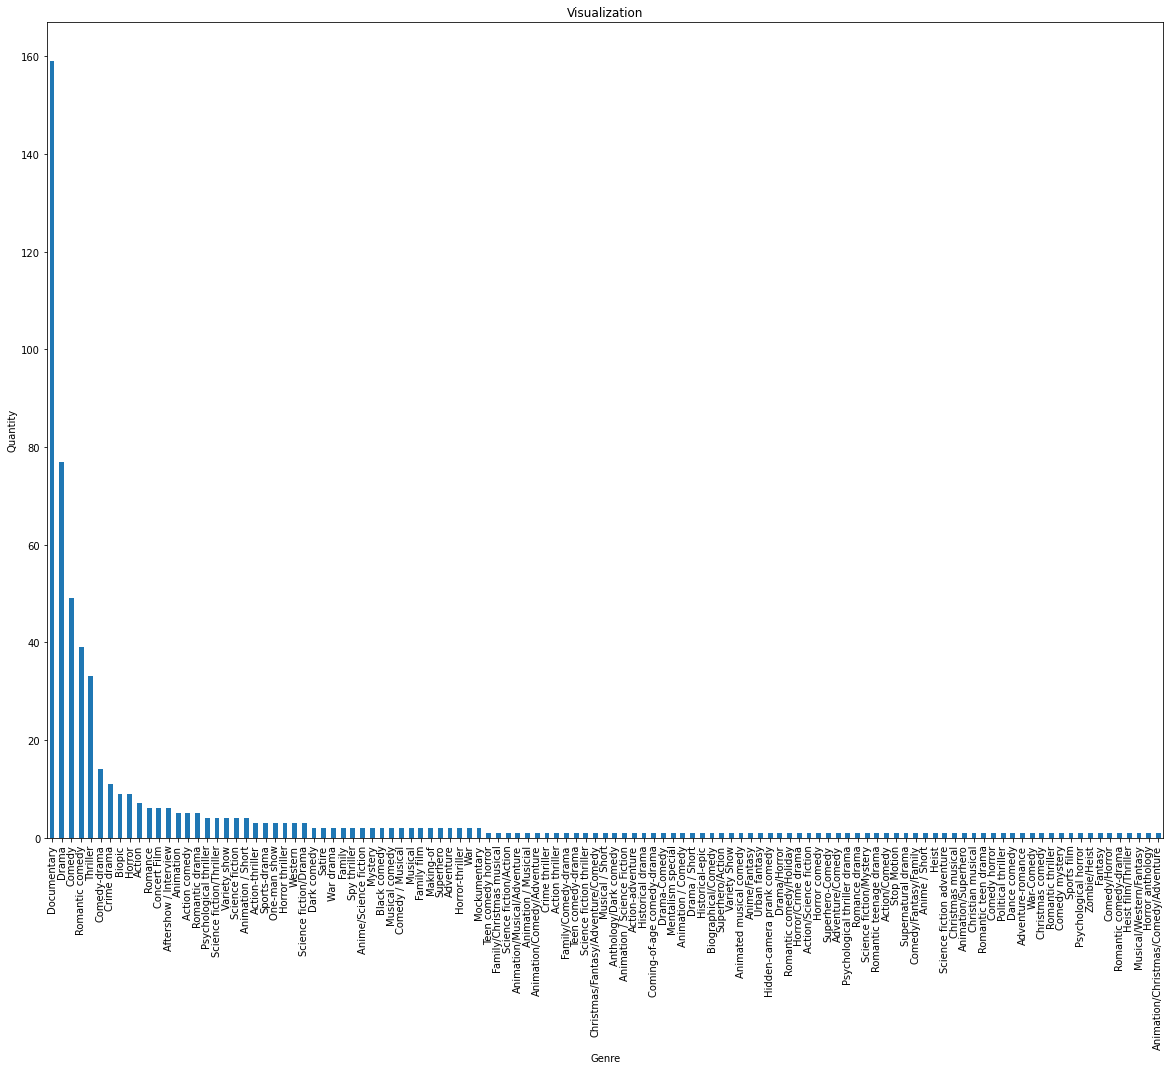

In [21]:
#Viz

plt.figure(figsize = (20,15))
data.Genre.value_counts().plot(kind='bar')
plt.title("Visualization")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.show()



*   As seen in the graph, there is the most found Documentary (about 160) in the Genre variable. Drama and Comedy follow this. The least common movie genre is Animation/Cristmas/Comedy/Adventure.


*   This means that while people are more in demand for Documentary, Drama and Comedy genres; not much in demand for other movie genres



## **6. The languages used in the top three in the movies in the dataset.**


In [22]:
print("The 3 most used languages:")
print(data.Language.value_counts()[:3])

The 3 most used languages:
English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64


## **7. Top 10 movies with the highest IMDB rating**

In [23]:
data.loc[:, ["IMDB Score", "Title"]].iloc[data["IMDB Score"].sort_values(ascending=False)[:10].index]

,IMDB Score,Title
583,9.0,David Attenborough: A Life on Our Planet
582,8.6,Emicida: AmarElo - It's All For Yesterday
581,8.5,Springsteen on Broadway
580,8.4,Winter on Fire: Ukraine's Fight for Freedom
579,8.4,Taylor Swift: Reputation Stadium Tour
578,8.4,Ben Platt: Live from Radio City Music Hall
577,8.3,Dancing with the Birds
576,8.3,Cuba and the Cameraman
573,8.2,Klaus
571,8.2,13th


We can see the top 10 movies with the highest IMDB Score.

## **8. What is the correlation between IMDB score and 'Runtime'?**

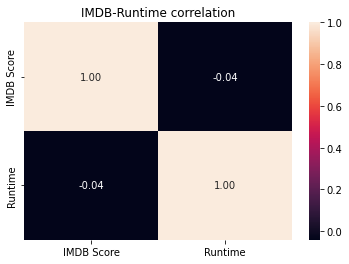

In [24]:
corr = data.loc[:, ["IMDB Score", "Runtime"]].corr()

sns.heatmap(corr, annot = True, fmt=".2f")
plt.title("IMDB-Runtime correlation")
plt.show() 


We see that there is a 4% negative correlation in the diagram.

## **9.Which are the top 10 'Genre' with the highest IMDB Score?**

In [33]:
imdb_10_genre = data.loc[:, ["IMDB Score", "Genre"]].iloc[data["IMDB Score"].sort_values(ascending=False)[:10].index]
imdb_10_genre

,IMDB Score,Genre
583,9.0,Documentary
582,8.6,Documentary
581,8.5,One-man show
580,8.4,Documentary
579,8.4,Concert Film
578,8.4,Concert Film
577,8.3,Documentary
576,8.3,Documentary
573,8.2,Animation/Christmas/Comedy/Adventure
571,8.2,Documentary


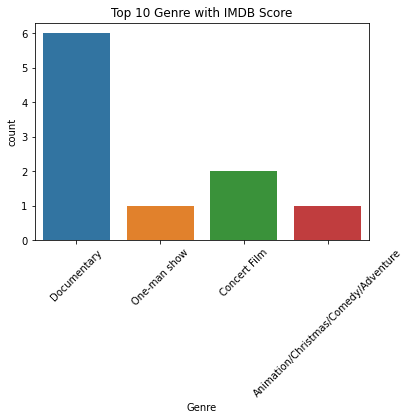

In [34]:
#viz. w. countplot

sns.countplot(imdb_10_genre.Genre)
plt.xticks(rotation=45)
plt.title("Top 10 Genre with IMDB Score")
plt.xticks(rotation=45)
plt.show()

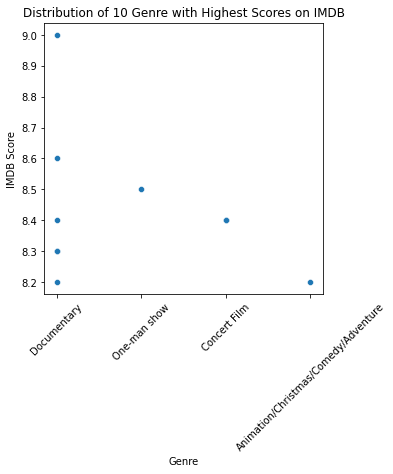

In [35]:
#viz. w. scatterplot 

plt.figure(figsize=(5,5))
sns.scatterplot(x= "Genre", y= "IMDB Score", data=imdb_10_genre)
plt.title("Distribution of 10 Genre with Highest Scores on IMDB")
plt.xticks(rotation=45)
plt.show()

In the top 10 'Genre' - 'Genre' with the highest IMDB Score, there are 4 genres as we can see in the visualization.


*   Documentary
*   One- man show
*   Concert Film 
*   Animation etc.



## **10. What are the top 10 movies with the highest 'runtime'? **

In [37]:
runtime_10_film = data.loc[:, ["Runtime", "Title"]].iloc[data["Runtime"].sort_values(ascending=False)[:10].index]
runtime_10_film

,Runtime,Title
561,209,The Irishman
328,155,Da 5 Bloods
581,153,Springsteen on Broadway
247,151,Citation
284,151,The Forest of Love
509,149,Raat Akeli Hai
7,149,The Last Days of American Crime
543,149,Ludo
194,148,Army of the Dead
5,147,Drive


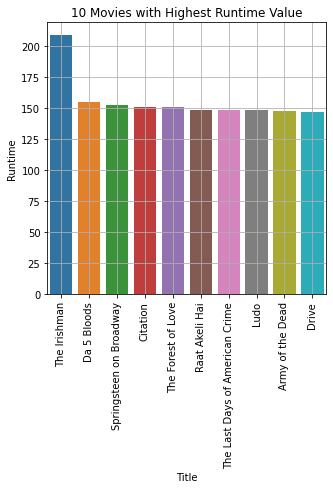

In [39]:
#Viz

plt.figure(figsize=(5,5))
sns.barplot(x= "Title", y= "Runtime", data=runtime_10_film)
plt.title("10 Movies with Highest Runtime Value")
plt.xticks(rotation=90)
plt.grid()
plt.show()


As we have seen in the top 10 movie visualizations with the highest RunTime value

The first three


*  The Irishman
*   De 5 Bloods
*   Springsteen on Broadway

Last Three

*   Ludo
*   Army of the Dead
*   Drive


## **11. In which year was the most movies released?**


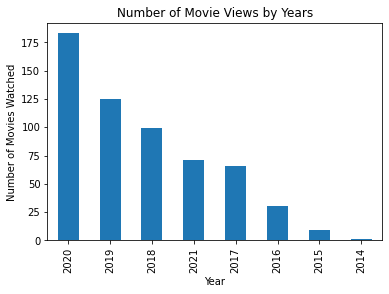

In [25]:
data["Year"].value_counts().plot(kind="bar")
plt.title("Number of Movie Views by Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies Watched")
plt.show()

When we look at the number of movies watched by years, we observe that while there is the highest rate of viewing in 2020, when we compare it with 2017, we observe that there is an increase of almost 100%.

## **12. Which language movies have the lowest average IMDB rating?**

In [26]:
threshold = 4.5 

film_worst_imdb = data.loc[:,["Language", "IMDB Score"]][data["IMDB Score"] < threshold]
film_worst_imdb

,Language,IMDB Score
0,English/Japanese,2.5
1,Spanish,2.6
2,Italian,2.6
3,English,3.2
4,Hindi,3.4
5,Hindi,3.5
6,Turkish,3.7
7,English,3.7
8,English,3.9
9,Hindi,4.1


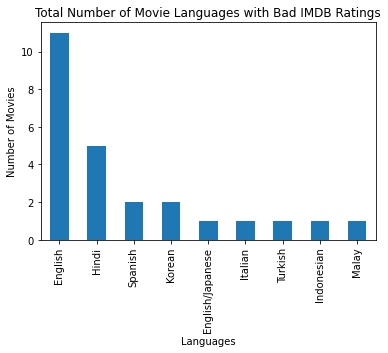

In [27]:
# Visualization of the total number of movie languages with bad IMDB rating

film_worst_imdb.Language.value_counts().plot(kind="bar")
plt.title("Total Number of Movie Languages with Bad IMDB Ratings")
plt.xlabel("Languages")
plt.ylabel("Number of Movies")
plt.show()

When we look at the visualizations made in the films with the lowest IMDB scores, English is at the top of the chart by a wide margin. However, English-Japanese, Italian, Turkish, Indonesian and Malaysian languages took place in the ranking with the same ratio.

## **13.Which year has the greatest total runtime?**

In [42]:
years_runtime = data[["Year", "Runtime"]].groupby("Year").sum()

years_runtime 

,Runtime
Year,
2014,81
2015,814
2016,2766
2017,6129
2018,9405
2019,10856
2020,17384
2021,7214


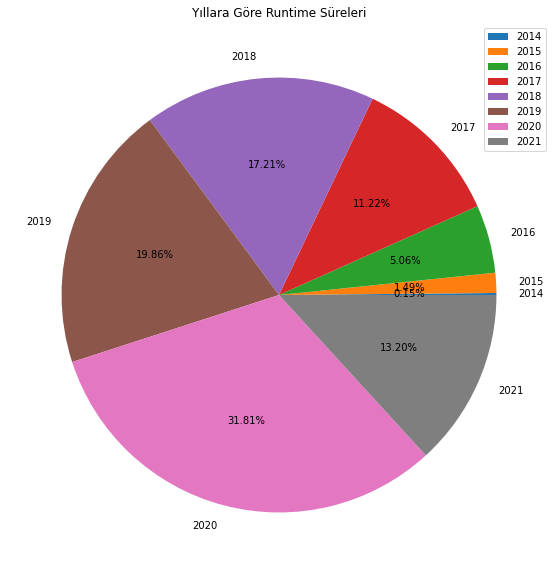

In [43]:


plt.figure(figsize=(10,10))
plt.pie(years_runtime["Runtime"], autopct="%.2f%%", labels=years_runtime.index)
plt.legend()
plt.title("Runtimes by Years")
plt.show()



While one man show ranked first with the highest percentage in 2020 with a rate of 31.81%, we observe that it had the least 'Runtime' period with a rate of 0.15% in 2014.

## **14. What is the "Genre" where each language is used the most?**

In [45]:
def lang_most_genre(data, columns):
    for col in columns:
        genre = data["Genre"][data["Language"] == col].mode()[0]
        count = data["Genre"][data["Language"] == col].value_counts()[0]
        if count > 1:
            print(f"{col} most used language(s) Genre:")
            print(f"{genre}({count} film)")
        else:
            print(f"{col} language(s) have been used at most once in movies.")
        print("*"*32)

langs=data.Language.unique()
lang_most_genre(data,langs)

English/Japanese language(s) have been used at most once in movies.
********************************
Spanish most used language(s) Genre:
Documentary(8 film)
********************************
Italian most used language(s) Genre:
Drama(4 film)
********************************
English most used language(s) Genre:
Documentary(120 film)
********************************
Hindi most used language(s) Genre:
Drama(13 film)
********************************
Turkish most used language(s) Genre:
Comedy(2 film)
********************************
Korean most used language(s) Genre:
Drama(2 film)
********************************
Indonesian most used language(s) Genre:
Drama(3 film)
********************************
Malay language(s) have been used at most once in movies.
********************************
Dutch language(s) have been used at most once in movies.
********************************
French most used language(s) Genre:
Documentary(6 film)
********************************
English/Spanish most used 